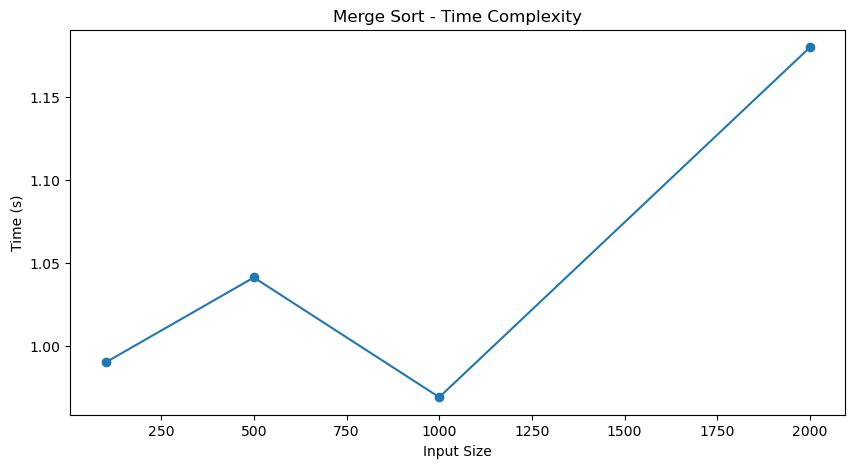

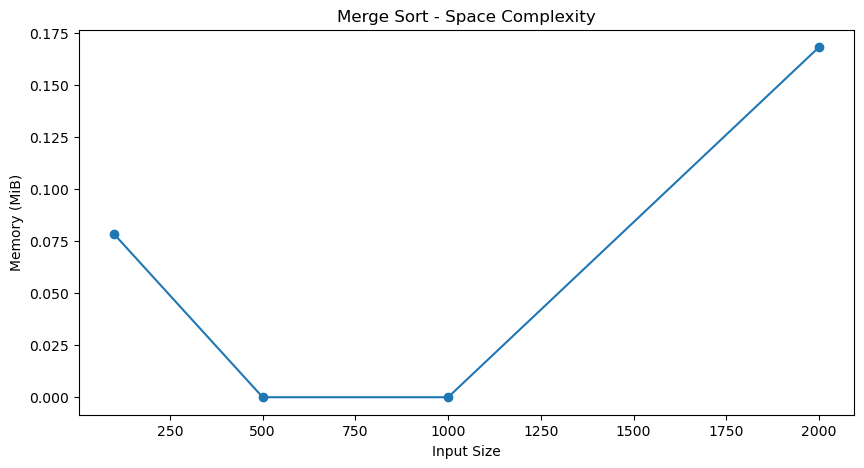

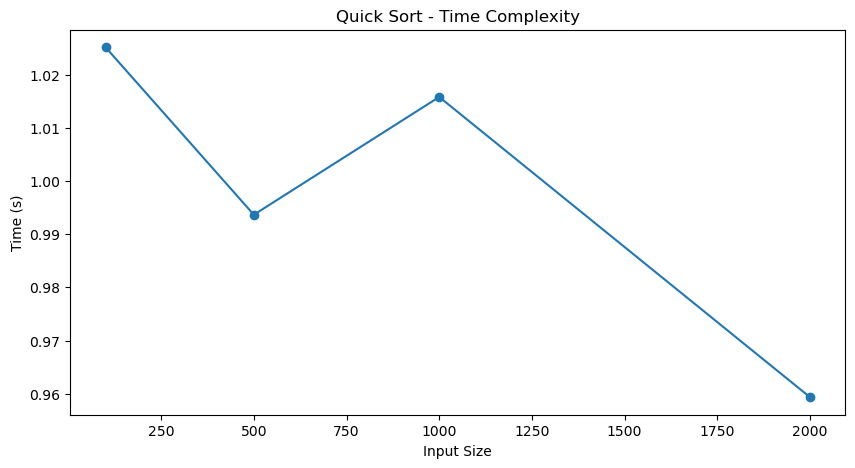

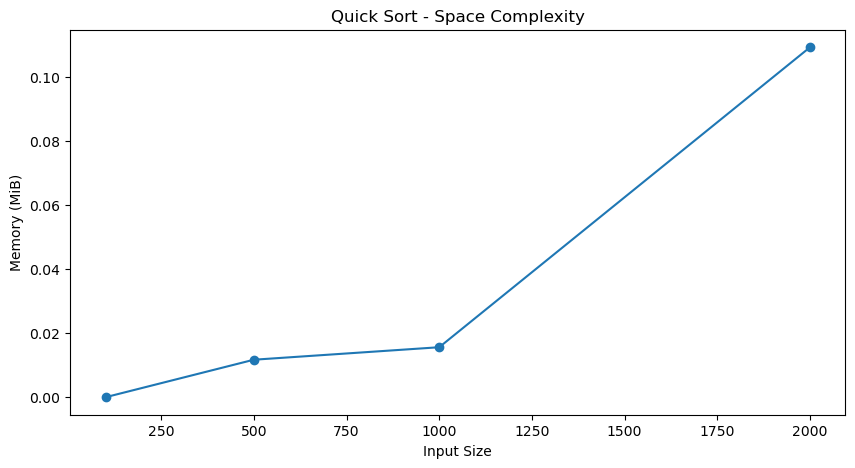

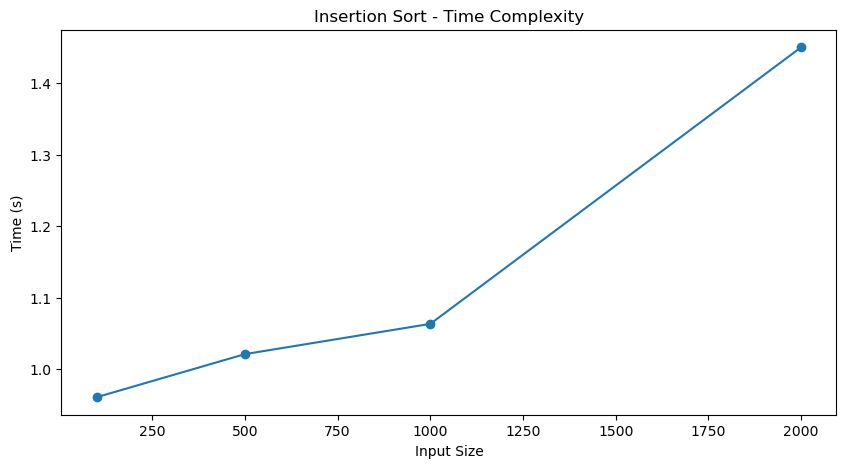

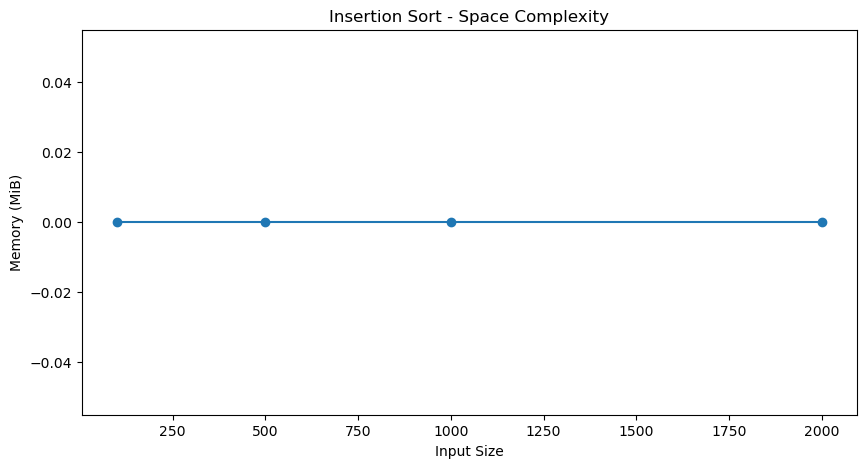

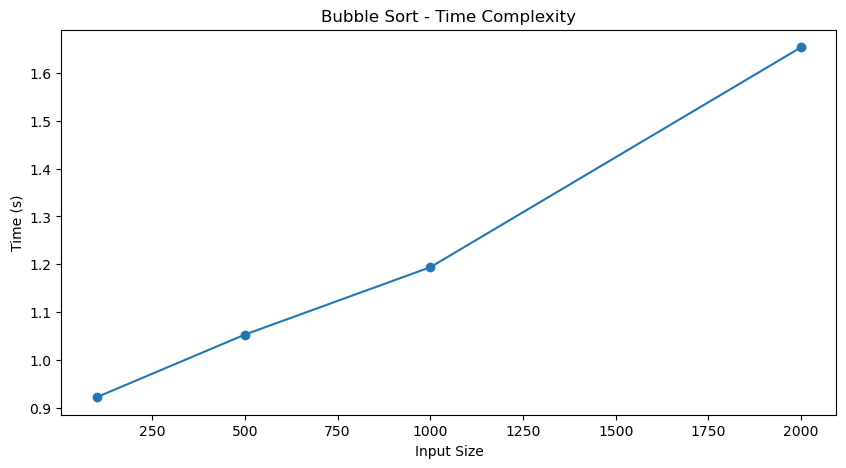

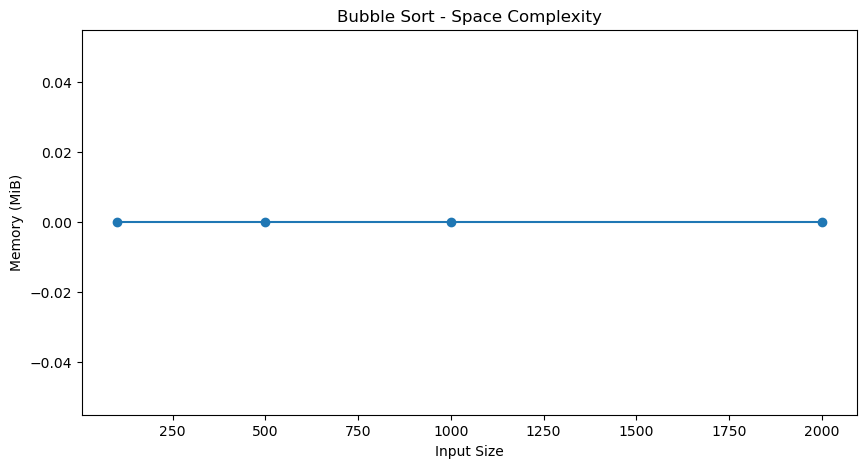

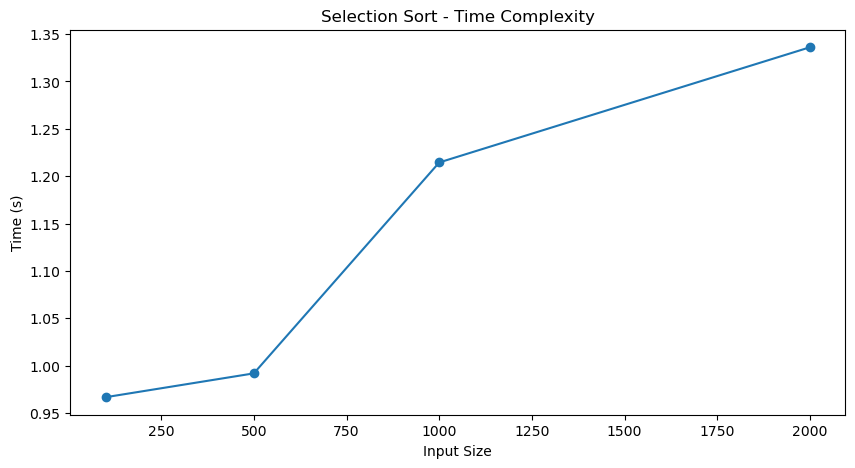

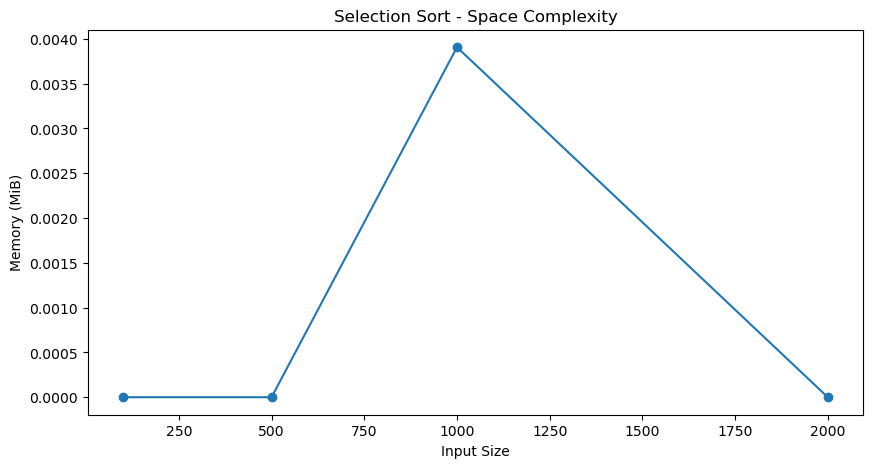

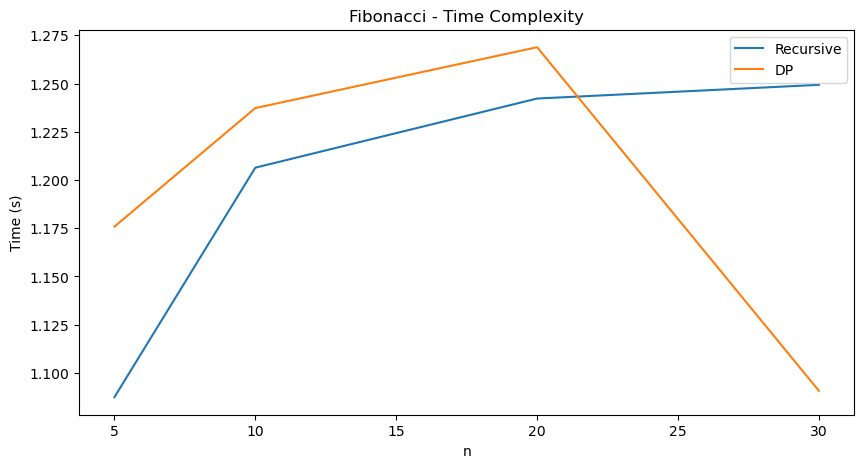

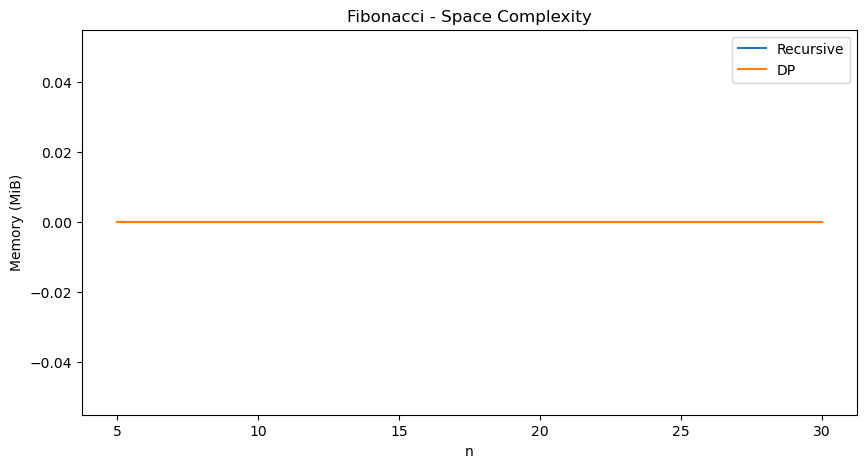

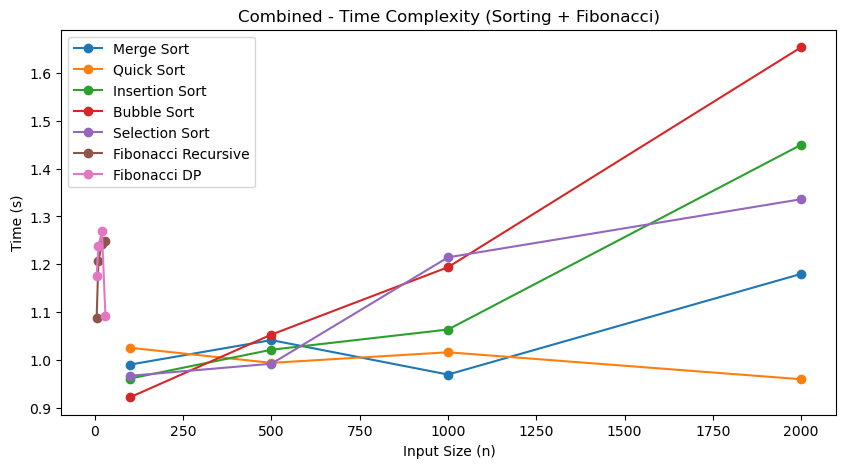

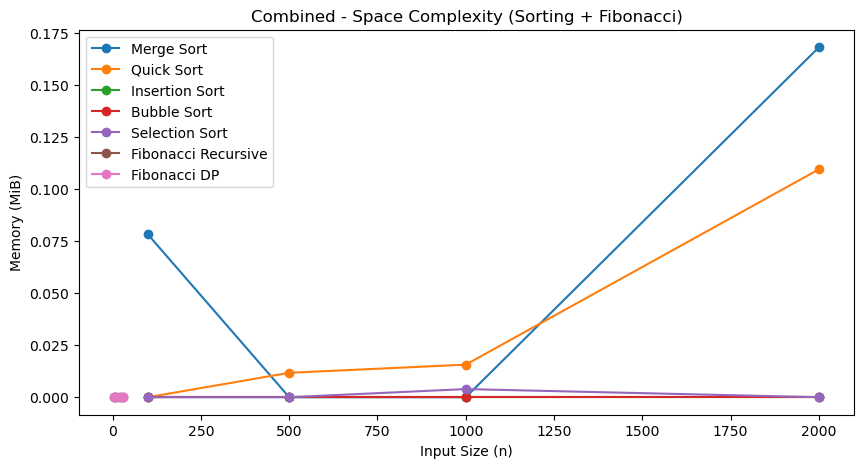

In [1]:


import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import random

# Helper function for profiling
def profile_func(func, *args):
    start = time.time()
    mem_usage = memory_usage((func, args), max_iterations=1)
    end = time.time()
    return end - start, max(mem_usage) - min(mem_usage)

# Fibonacci Algorithms
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_dp(n):
    if n <= 1:
        return n
    dp = [0]*(n+1)
    dp[0], dp[1] = 0, 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

# Sorting Algorithms

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result.extend(left[i:]); result.extend(right[j:])
    return result

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[random.randint(0, len(arr)-1)]
    less = [x for x in arr if x < pivot]
    equal = [x for x in arr if x == pivot]
    greater = [x for x in arr if x > pivot]
    return quick_sort(less) + equal + quick_sort(greater)

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


# Searching Algorithm
def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low+high)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid+1
        else:
            high = mid-1
    return -1

# Profiling Sorting Algorithms
algorithms = {
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
}

sizes = [100, 500, 1000, 2000]
results_time = {name: [] for name in algorithms}
results_mem = {name: [] for name in algorithms}

for size in sizes:
    arr = list(np.random.randint(0, 10000, size))
    for name, func in algorithms.items():
        t, m = profile_func(func, arr.copy())
        results_time[name].append(t)
        results_mem[name].append(m)

# Individual graphs for each sorting algorithm
for name in algorithms:
    plt.figure(figsize=(10,5))
    plt.plot(sizes, results_time[name], marker='o')
    plt.xlabel("Input Size"); plt.ylabel("Time (s)")
    plt.title(f"{name} - Time Complexity")
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(sizes, results_mem[name], marker='o')
    plt.xlabel("Input Size"); plt.ylabel("Memory (MiB)")
    plt.title(f"{name} - Space Complexity")
    plt.show()

# Profiling Fibonacci
fib_sizes = [5, 10, 20, 30]   # small sizes for recursive
rec_times, rec_mems = [], []
dp_times, dp_mems = [], []

for n in fib_sizes:
    t, m = profile_func(fib_recursive, n)
    rec_times.append(t); rec_mems.append(m)
    t, m = profile_func(fib_dp, n)
    dp_times.append(t); dp_mems.append(m)

# Individual Fibonacci graphs
plt.figure(figsize=(10,5))
plt.plot(fib_sizes, rec_times, label="Recursive")
plt.plot(fib_sizes, dp_times, label="DP")
plt.xlabel("n"); plt.ylabel("Time (s)")
plt.title("Fibonacci - Time Complexity")
plt.legend(); plt.show()

plt.figure(figsize=(10,5))
plt.plot(fib_sizes, rec_mems, label="Recursive")
plt.plot(fib_sizes, dp_mems, label="DP")
plt.xlabel("n"); plt.ylabel("Memory (MiB)")
plt.title("Fibonacci - Space Complexity")
plt.legend(); plt.show()

# Combined Graphs (Sorting + Fibonacci)

combined_time = {**results_time, 
                 "Fibonacci Recursive": rec_times, 
                 "Fibonacci DP": dp_times}

combined_mem = {**results_mem, 
                "Fibonacci Recursive": rec_mems, 
                "Fibonacci DP": dp_mems}

plt.figure(figsize=(10,5))
for name, times in combined_time.items():
    if "Fibonacci" in name:
        plt.plot(fib_sizes, times, marker='o', label=name)  
    else:
        plt.plot(sizes, times, marker='o', label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Time (s)")
plt.title("Combined - Time Complexity (Sorting + Fibonacci)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for name, mems in combined_mem.items():
    if "Fibonacci" in name:
        plt.plot(fib_sizes, mems, marker='o', label=name)  
    else:
        plt.plot(sizes, mems, marker='o', label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Memory (MiB)")
plt.title("Combined - Space Complexity (Sorting + Fibonacci)")
plt.legend()
plt.show()
